In [222]:
import numpy as np
from scipy.linalg import solve_discrete_are, inv, norm
import matplotlib.pyplot as plt

# Super Homework
## (1)
Let 
$\mathbf{x}_{k+1} = \begin{pmatrix}
s_x \\
s_y \\
s_z \\
V_x \\
V_y \\
V_z
\end{pmatrix}$
and 
$\mathbf{u}_k = \begin{pmatrix}
u_x \\
u_y \\
u_z 
\end{pmatrix}$.
Then 
$\mathbf{x}_{k+1} = \begin{pmatrix}
1 & 0 & 0 & 0.1 & 0 & 0 \\
0 & 1 & 0 & 0 & 0.1 & 0 \\
0 & 0 & 1 & 0 & 0 & 0.1 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{pmatrix} \mathbf{x}_k + 
\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix} \mathbf{u}_k
$

With an observation operator being 
$\mathbf{z}_k = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0\\
\end{pmatrix} \mathbf{x}_k$


## (2)
$\underset{u}{min}\frac{1}{2}\sum_{k=1}^{100}[\mathbf{x}_k^T\begin{pmatrix}
50 & 0 & 0 & 0 & 0 & 0\\
0 & 50 & 0 & 0 & 0 & 0\\
0 & 0 & 50 & 0 & 0 & 0\\
0 & 0 & 0 & 10 & 0 & 0\\
0 & 0 & 0 & 0 & 10 & 0\\
0 & 0 & 0 & 0 & 0 & 10\\
\end{pmatrix} 
\mathbf{x}_k + \mathbf{u}_k^T \begin{pmatrix}
600 & 0 & 0 \\
0 & 600 & 0 \\
0 & 0 & 600 \\
\end{pmatrix} \mathbf{u}_k ] + \mathbf{x}_{100}^T \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 1\\
\end{pmatrix} \mathbf{x}_{100}$

See code below to verify that the final x position is nearly zero and that the thrust doesn't exceed $|\mathbf{u}| \approx 10$


Seeing if |u| < 10
passed


array([ 4.45968584e-05, -8.91937169e-05, -1.33790575e-04,  3.91759785e-06,
       -7.83519570e-06, -1.17527936e-05])

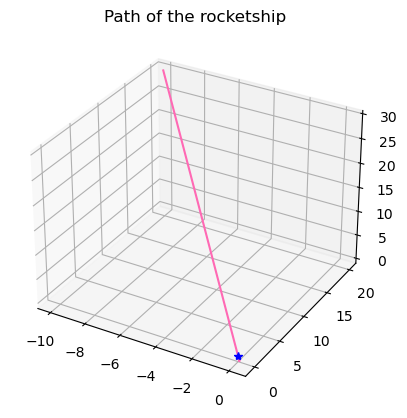

In [285]:
# set x0 and the matrices as given above
x0 = np.array([-10,20,30,0,0,0])
Q = 10*np.diag([5,5,5,1,1,1])
R = 600*np.eye(3)
A = np.eye(6) + np.diag([0.1]*3, 3)
B = np.vstack([np.zeros((3,3)), np.eye(3)])

# initalize M as the final matrix for the Ps
Ps = [np.diag([1,1,1,1,1,1])]
Ks = []

# iterate through using the formulas in the notes
for i in range(100):
    P = Ps[-1]
    K = -inv(R + B.T@P@B)@B.T@P@A
    P_new = Q + A.T@P@A - A.T@P@B@inv(R + B.T@P@B)@B.T@P@A
    Ks.append(K)
    Ps.append(P_new)

# reverse the order of K
Ks = Ks[::-1]    
us = []
xs = [x0]

# evolve the system to get the final state
for i in range(100):
    u = Ks[i] @ xs[-1]
    x = A@xs[-1] + B@u
    us.append(u)
    xs.append(x)

# now check to see if u statifies |u| approx 10
print('Seeing if |u| < 10')
for u in us:
    if norm(u) > 10:
        print('Failed')
print('passed')

# show the final state of x to verify that it is close to zero
display(xs[-1])

# make the fig object
fig = plt.figure()

# get the 3d subplot
ax = fig.add_subplot(111, projection='3d')

x = np.array(xs)

ax.plot(x[:,0], x[:,1], x[:,2], color='hotpink')
ax.plot(x[-1,0], x[-1,1], x[-1,2], '*', color='blue')
plt.title('Path of the rocketship')
plt.show()

As you can see the last position of x is nearly 0 for all values and u doesn't get too big

## (3)

In [328]:
# set x0 and the matrices as given above
x0 = np.array([-10,20,30,0,0,0])
Q = 10*np.diag([5,5,5,1,1,1])
R = 600*np.eye(3)
A = np.eye(6) + np.diag([0.1]*3, 3)
B = np.vstack([np.zeros((3,3)), np.eye(3)])

# initalize M as the final matrix for the Ps
Ps = [np.diag([1,1,1,1,1,1])]
Ks = []

W = np.eye(6)*0.05
V = np.eye(3)*0.5
H = np.hstack((np.eye(3), np.zeros((3,3))))

# set up the lqr gain
for i in range(100):
    P = Ps[-1]
    K = -inv(R + B.T@P@B)@B.T@P@A
    P_new = Q + A.T@P@A - A.T@P@B@inv(R + B.T@P@B)@B.T@P@A
    Ks.append(K)
    Ps.append(P_new)

# reverse the order of K since it is created backwards
Ps = Ps[::-1]  

# initialize the covariance  matrix
Ss = [np.eye(6)*0.01]
Ls = []

# compute the kalman gain
for i in range(100):
    S = Ss[-1]
    L = S@H.T@inv(H@S@H.T+V)
    S_temp = (np.eye(len(L)) - L@H)@S
    S_new = A@S_temp@A.T + W
    Ss.append(S_new)
    Ls.append(L)


xs = [x0]
us = [Ks[i] @ xs[-1]]

# evolve the system to get the final state
for i in range(100):
    x_temp = A@xs[-1] + B@us[-1] + np.random.multivariate_normal(np.zeros(len(W)), W)
    z = H @ x_temp + np.random.multivariate_normal(np.zeros(len(V)),V)
    x = x_temp + Ls[i]@(z - H @ x_temp)
    u = Ks[i] @ x
    us.append(u)
    xs.append(x_temp)

# now check to see if u statifies |u| approx 10
print('Seeing if |u| < 10')
failed = False
for u in us:
    if norm(u) > 10:
        failed = True
if failed:
    print('Failed')
else:
    print('Passed')

# show the final state of x to verify that it is close to zero
display(xs[-1])

Seeing if |u| < 10
Passed


array([ 9.51714704e-01, -1.22011120e+00,  1.85926513e-04, -5.92066131e-01,
        9.17155069e-01,  3.37532348e-01])

We see that it is 'close' to the origin now and here is the path

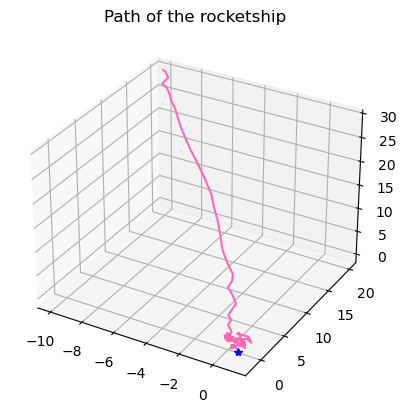

In [329]:
# make the fig object
fig = plt.figure()

# get the 3d subplot
ax = fig.add_subplot(111, projection='3d')

x = np.array(xs)

ax.plot(x[:,0], x[:,1], x[:,2], color='hotpink')
ax.plot(x[-1,0], x[-1,1], x[-1,2], '*', color='blue')
plt.title('Path of the rocketship')
plt.show()